Notebook for viewing calculated.

In [17]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pickle


from janelia_core.dataprocessing.dataset import ROIDataset
#from janelia_core.fileio.data_handlers import NDArrayHandler

# Parameters go here

In [9]:
dataset_path = r'W:\SV4\CW_18-02-15\L1-561nm-openLoop_20180215_163233.corrected\extracted\dataset.pkl'

In [10]:
with open(dataset_path, 'rb') as f:
        dataset = ROIDataset.from_dict(pickle.load(f))

# Look at DFF through time

In [43]:
f = dataset.ts_data['f_brain_rois_1_5_5']['vls'][:]
bl_short = dataset.ts_data['bl_brain_rois_1_5_5_161']['vls'][:]
bl_long = dataset.ts_data['bl_brain_rois_1_5_5_long']['vls'][:]

dff_short = np.divide(f, bl_short)
dff_long = np.divide(f, bl_long)

Text(0.5, 0, 'Sample')

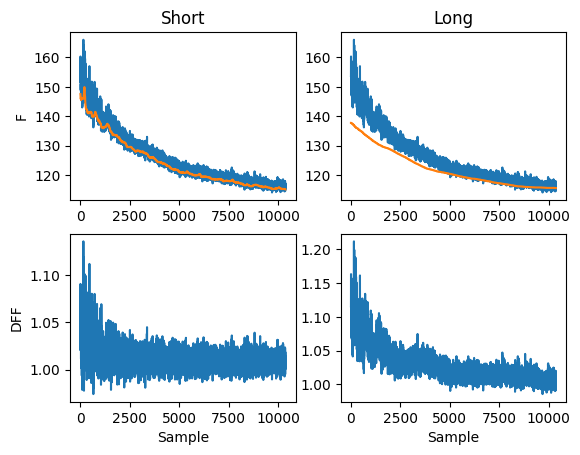

In [82]:
roi_index = 28758 #100
start_smp = 0
stop_smp = dff_short.shape[1]
plt.figure()
s = plt.subplot(2, 2, 1)
plt.title('Short')
plt.plot(f[start_smp:stop_smp, roi_index])
plt.plot(bl[start_smp:stop_smp, roi_index])
plt.ylabel('F')
s = plt.subplot(2, 2, 3)
plt.plot(dff_short[start_smp:stop_smp, roi_index])
plt.ylabel('DFF')
plt.xlabel('Sample')


s = plt.subplot(2, 2, 2)
plt.title('Long')
plt.plot(f[start_smp:stop_smp, roi_index])
plt.plot(bl_long[start_smp:stop_smp, roi_index])
s = plt.subplot(2, 2, 4)
plt.plot(dff_long[start_smp:stop_smp, roi_index])
plt.xlabel('Sample')



In [74]:
sorted = np.argsort(np.max(dff_short, axis=0))

In [77]:
sorted[125000]

28758

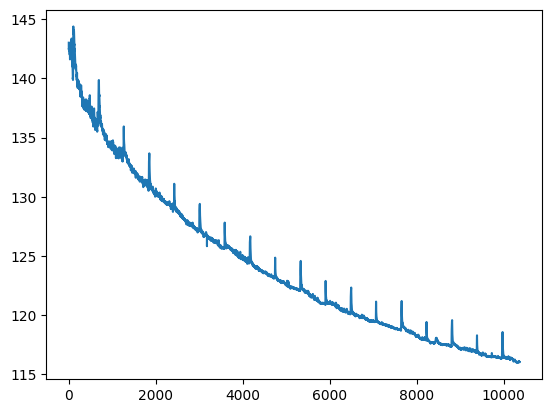

In [81]:
plt.plot(np.mean(f, axis=1))